# **QSAR Model Building of Coronavirus Replicase 1ab Inhibitors**

Rajesh Das

# Read in data

In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('Replicase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.408935
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.677781
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.096910
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.801343
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.397940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.474955
163,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.341989
164,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.782516
165,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.424812


In [3]:
X = dataset.drop(['pIC50'], axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
163,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
164,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
165,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
Y = dataset.iloc[:,-1]
Y

0      6.408935
1      6.677781
2      7.096910
3      5.801343
4      7.397940
         ...   
162    5.474955
163    5.341989
164    5.782516
165    5.424812
166    5.954677
Name: pIC50, Length: 167, dtype: float64

# Remove low variance features

In [5]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP2,PubchemFP3,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP19,PubchemFP20,...,PubchemFP735,PubchemFP756,PubchemFP758,PubchemFP761,PubchemFP777,PubchemFP798,PubchemFP818,PubchemFP819,PubchemFP821,PubchemFP824
0,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,1,1,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,1,0,1,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
163,1,0,1,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
164,1,0,1,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
165,1,0,1,0,1,1,0,0,1,0,...,0,1,1,0,0,0,0,1,1,0


In [6]:
X.to_csv('descriptor_list.csv', index = False)

In [ ]:
# In the app, use the following to get this same descriptor list
# of 218 variables from the initial set of 881 variables
# Xlist = list(pd.read_csv('descriptor_list.csv').columns)
# X[Xlist]

# Random Forest Regression Model

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
model1 = RandomForestRegressor(n_estimators=500, random_state=42)
model1.fit(X, Y)
r2 = model1.score(X, Y)
r2

0.8847719345718728

## Model Prediction

In [10]:
Y_pred = model1.predict(X)
Y_pred

array([6.32730874, 6.40574285, 6.8691362 , 5.92399203, 6.87368997,
       5.73000098, 6.220474  , 6.4182881 , 6.76101753, 6.33819851,
       5.68671286, 6.38808163, 6.41990397, 6.40705248, 6.69882346,
       6.58538884, 5.6395287 , 7.20969668, 6.1855238 , 6.29858151,
       7.14281236, 6.75330607, 6.70343588, 6.46059929, 6.50809797,
       7.03038108, 5.91879773, 5.72722719, 6.01693168, 5.87244302,
       5.71018314, 5.94599939, 6.10047841, 6.72298343, 5.87644653,
       6.05845971, 5.59297924, 5.63431288, 5.72141136, 5.97592681,
       6.18026441, 6.05455837, 6.23880704, 6.38808163, 6.5036339 ,
       5.80334068, 6.0120112 , 5.6395287 , 5.98487963, 6.03272872,
       5.79033905, 6.46234596, 5.76509853, 5.8284396 , 5.98994167,
       6.33167486, 5.29161594, 5.69992448, 5.66191453, 6.14814004,
       6.44778404, 6.96842338, 6.94180884, 6.16537126, 5.75906279,
       5.99196265, 7.0235188 , 6.56908742, 6.57000147, 6.56620722,
       5.56359935, 5.8151039 , 5.88846393, 6.29828135, 6.35302

## Model Performance

In [11]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, Y_pred))

Mean squared error (MSE): 0.12
Coefficient of determination (R^2): 0.88


# Data Visualization (Experimental vs Predicted pIC50 for Training Data)

In [12]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experimental pIC50')

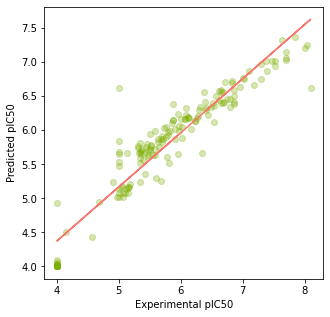

In [13]:
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

# Save Model as Pickle Object

In [14]:
import pickle

In [16]:
pickle.dump(model1, open('Replicase_RF_model.pkl', 'wb'))